In [ ]:
import pandas as pd

df = pd.read_csv("/content/jena_climate_2009_2016.csv")

df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True)
df.set_index('Date Time', inplace=True)

df.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df.index.min(), df.index.max()


(Timestamp('2009-01-01 00:10:00'), Timestamp('2017-01-01 00:00:00'))

In [ ]:
df = df[::6]
df.shape


(70092, 14)

In [ ]:
df.columns


Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df)

scaled_df = pd.DataFrame(
    scaled_values,
    columns=df.columns,
    index=df.index
)

scaled_df.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,0.874205,-2.073918,-2.127355,-2.058643,1.049597,-1.323899,-1.535329,-0.780543,-1.537035,-1.539529,2.293544,-0.010242,-0.015990,-0.261848
2009-01-01 01:10:00,0.871812,-2.026433,-2.079147,-1.969494,1.140630,-1.309687,-1.499475,-0.788710,-1.499382,-1.504109,2.241764,-0.023229,-0.030806,-0.098256
2009-01-01 02:10:00,0.887365,-2.172448,-2.224946,-2.177509,1.061735,-1.351032,-1.580743,-0.784627,-1.582219,-1.584395,2.402609,-0.023535,-0.032526,-0.192725
2009-01-01 03:10:00,0.916077,-2.171261,-2.226122,-2.176023,1.061735,-1.349740,-1.580743,-0.784627,-1.578453,-1.584395,2.409113,-0.024910,-0.035833,-0.526822
2009-01-01 04:10:00,0.937612,-2.217558,-2.274330,-2.259229,0.982840,-1.362660,-1.611817,-0.776460,-1.612341,-1.615092,2.465396,-0.024452,-0.034113,0.332614


In [ ]:
total_len = len(scaled_df)

train_end = int(0.7 * total_len)
val_end   = int(0.9 * total_len)

train = scaled_df[:train_end]
val   = scaled_df[train_end:val_end]
test  = scaled_df[val_end:]


In [ ]:
PAST_HOURS = 24   # past 24 hours
FUTURE_HOURS = 1 # predict next 1 hour
TARGET = "T (degC)"


In [ ]:
import numpy as np

def create_sequences(data, target, past, future):
    X, y = [], []
    for i in range(past, len(data) - future):
        X.append(data.iloc[i-past:i].values)
        y.append(data.iloc[i + future][target])
    return np.array(X), np.array(y)


In [ ]:
X_train, y_train = create_sequences(train, TARGET, PAST_HOURS, FUTURE_HOURS)
X_val, y_val     = create_sequences(val, TARGET, PAST_HOURS, FUTURE_HOURS)
X_test, y_test   = create_sequences(test, TARGET, PAST_HOURS, FUTURE_HOURS)

X_train.shape, y_train.shape


((49039, 24, 14), (49039,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(PAST_HOURS, X_train.shape[2])),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,673 (127.63 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val, y_val)
)


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - loss: 0.2097 - mae: 0.3344 - val_loss: 0.0451 - val_mae: 0.1605
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0545 - mae: 0.1789 - val_loss: 0.0348 - val_mae: 0.1365
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0450 - mae: 0.1616 - val_loss: 0.0296 - val_mae: 0.1238
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0389 - mae: 0.1505 - val_loss: 0.0280 - val_mae: 0.1186
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0354 - mae: 0.1424 - val_loss: 0.0247 - val_mae: 0.1116
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0335 - mae: 0.1381 - val_loss: 0.0222 - val_mae: 0.1053
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0317 - mae: 0.1341 - val_loss: 0.0229 - val_mae: 0.1087
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - loss: 0.0315 - mae: 0.1327 - val_loss: 0.0205 - val_mae: 0.1010
Epoch 9/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE:", test_mae)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0160 - mae: 0.0930
Test MAE: 0.09323061257600784


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


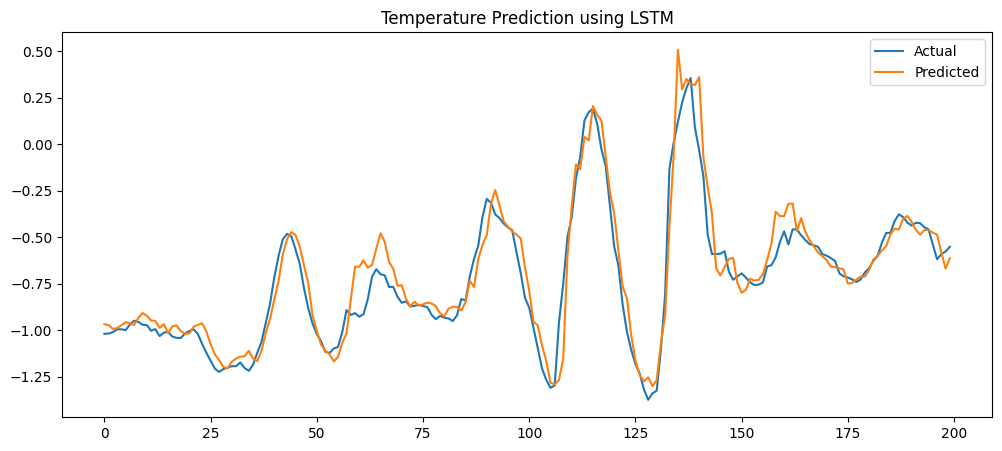

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test[:200], label="Actual")
plt.plot(predictions[:200], label="Predicted")
plt.legend()
plt.title("Temperature Prediction using LSTM")
plt.show()
